# Chocolate bars analysis

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('chocolate.csv', index_col=0)
df.head()

ref   company company_location  review_date country_of_bean_origin  \
0  2454      5150            U.S.A         2019             Madagascar   
1  2458      5150            U.S.A         2019     Dominican republic   
2  2454      5150            U.S.A         2019               Tanzania   
3   797  A. Morin           France         2012                   Peru   
4   797  A. Morin           France         2012                Bolivia   

  specific_bean_origin_or_bar_name  cocoa_percent  rating  \
0           Bejofo Estate, batch 1           76.0    3.75   
1                  Zorzal, batch 1           76.0    3.50   
2            Kokoa Kamili, batch 1           76.0    3.25   
3                             Peru           63.0    3.75   
4                          Bolivia           70.0    3.50   

   counts_of_ingredients      beans       cocoa_butter          vanilla  \
0                      3  have_bean  have_cocoa_butter  have_not_vanila   
1                      3  have_bean  have_cocoa_butter  have_not_vanila   
2                      3  have_bean  have_cocoa_butter  have_not_vanila   
3                      4  have_bean  have_cocoa_butter  have_not_vanila   
4                      4  have_bean  have_cocoa_butter  have_not_vanila   

            lecithin           salt       sugar  \
0  have_not_lecithin  have_not_salt  have_sugar   
1  have_not_lecithin  have_not_salt  have_sugar   
2  have_not_lecithin  have_not_salt  have_sugar   
3      have_lecithin  have_not_salt  have_sugar   
4      have_lecithin  have_not_salt  have_sugar   

            sweetener_without_sugar first_taste second_taste third_taste  \
0  have_not_sweetener_without_sugar       cocoa   blackberry   full body   
1  have_not_sweetener_without_sugar       cocoa      vegetal      savory   
2  have_not_sweetener_without_sugar  rich cocoa        fatty      bready   
3  have_not_sweetener_without_sugar      fruity        melon      roasty   
4  have_not_sweetener_without_sugar     vegetal        nutty         NaN   

  fourth_taste  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [2]:
df['cocoa_percent'].isnull().sum()

0

In [3]:
df.shape

(2224, 20)

In [4]:
df.describe()

ref  review_date  cocoa_percent       rating  \
count  2224.000000  2224.000000    2224.000000  2224.000000   
mean   1337.010342  2013.857914      71.493930     3.198561   
std     693.959768     3.582151       5.278253     0.434329   
min       5.000000  2006.000000      42.000000     1.000000   
25%     776.000000  2011.000000      70.000000     3.000000   
50%    1381.000000  2014.000000      70.000000     3.250000   
75%    1928.000000  2016.000000      74.000000     3.500000   
max    2490.000000  2020.000000     100.000000     4.000000   

       counts_of_ingredients  
count            2224.000000  
mean                3.075989  
std                 0.929875  
min                 1.000000  
25%                 2.000000  
50%                 3.000000  
75%                 4.000000  
max                 6.000000

In [5]:
df.isna().sum()

ref                                    0
company                                0
company_location                       0
review_date                            0
country_of_bean_origin                 0
specific_bean_origin_or_bar_name       0
cocoa_percent                          0
rating                                 0
counts_of_ingredients                  0
beans                                  0
cocoa_butter                           0
vanilla                                0
lecithin                               0
salt                                   0
sugar                                  0
sweetener_without_sugar                0
first_taste                            0
second_taste                          77
third_taste                          620
fourth_taste                        1982
dtype: int64

In [6]:
mean_rating = df['rating'].mean()
mean_rating

3.198561151079137

In [7]:
median_rating = df['rating'].median()
median_rating

3.25

## 💪 Challenge
Create a report to summarize your research. Include:

1. What is the average rating by country of origin?
2. How many bars were reviewed for each of those countries?
3. Create plots to visualize findings for questions 1 and 2.
4. Is the cacao bean's origin an indicator of quality? 
5. [Optional] How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?
6. [Optional 2] Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).
7. Summarize your findings.

## Attempt to answer a question:
1. What is the average rating by country of origin?
2. How many bars were reviewed for each of those countries?
3. Create plots to visualize findings for questions 1 and 2.
4. Is the cacao bean's origin an indicator of quality? 

In [8]:
df_bean_origin = df[['country_of_bean_origin', 'rating']]
df_bean_origin = df_bean_origin.rename(columns={'country_of_bean_origin': 'Country'})
df_bean_origin['Country'] = df_bean_origin['Country'].str.title()
df_bean_origin.head()

Country  rating
0          Madagascar    3.75
1  Dominican Republic    3.50
2            Tanzania    3.25
3                Peru    3.75
4             Bolivia    3.50

In [10]:
df_countries = pd.read_csv('countries of the world.csv', index_col=0)
df_countries.head()

Region  Population  \
Country                                                            
Afghanistan            ASIA (EX. NEAR EAST)             31056997   
Albania          EASTERN EUROPE                          3581655   
Algeria          NORTHERN AFRICA                        32930091   
American Samoa   OCEANIA                                   57794   
Andorra          WESTERN EUROPE                            71201   

                 Area (sq. mi.) Pop. Density (per sq. mi.)  \
Country                                                      
Afghanistan              647500                       48,0   
Albania                   28748                      124,6   
Algeria                 2381740                       13,8   
American Samoa              199                      290,4   
Andorra                     468                      152,1   

                Coastline (coast/area ratio) Net migration  \
Country                                                      
Afghanistan                             0,00         23,06   
Albania                                 1,26         -4,93   
Algeria                                 0,04         -0,39   
American Samoa                         58,29        -20,71   
Andorra                                 0,00           6,6   

                Infant mortality (per 1000 births)  GDP ($ per capita)  \
Country                                                                  
Afghanistan                                 163,07               700.0   
Albania                                      21,52              4500.0   
Algeria                                         31              6000.0   
American Samoa                                9,27              8000.0   
Andorra                                       4,05             19000.0   

                Literacy (%) Phones (per 1000) Arable (%) Crops (%) Other (%)  \
Country                                                                         
Afghanistan             36,0               3,2      12,13      0,22     87,65   
Albania                 86,5              71,2      21,09      4,42     74,49   
Algeria                 70,0              78,1       3,22      0,25     96,53   
American Samoa          97,0             259,5         10        15        75   
Andorra                100,0             497,2       2,22         0     97,78   

                Climate Birthrate Deathrate Agriculture Industry Service  
Country                                                                   
Afghanistan           1      46,6     20,34        0,38     0,24    0,38  
Albania               3     15,11      5,22       0,232    0,188   0,579  
Algeria               1     17,14      4,61       0,101      0,6   0,298  
American Samoa        2     22,46      3,27         NaN      NaN     NaN  
Andorra               3      8,71      6,25         NaN      NaN     NaN

In [11]:
df_countries = df_countries.drop(df_countries.columns[1:], axis=1)
df_countries.head()

Region
Country                                             
Afghanistan            ASIA (EX. NEAR EAST)         
Albania          EASTERN EUROPE                     
Algeria          NORTHERN AFRICA                    
American Samoa   OCEANIA                            
Andorra          WESTERN EUROPE

In [12]:
df_countries = df_countries.reset_index()
df_countries['Country'] = df_countries['Country'].str.strip()
df_countries['Region'] = df_countries['Region'].str.strip()
df_countries.head()

Country                Region
0     Afghanistan  ASIA (EX. NEAR EAST)
1         Albania        EASTERN EUROPE
2         Algeria       NORTHERN AFRICA
3  American Samoa               OCEANIA
4         Andorra        WESTERN EUROPE

In [13]:
set(df_bean_origin['Country']) - set(df_countries['Country'])

{'Blend',
 'Bolvia',
 'Congo',
 'Dr Congo',
 'Ivory Coast',
 'Principe',
 'Sao Tome',
 'St. Lucia',
 'St.Vincent-Grenadines',
 'Sulawesi',
 'Sumatra',
 'Tobago',
 'Trinidad',
 'U.S.A.'}

In [14]:
# rename non valid country names in df_bean_origin
df_bean_origin.loc[df_bean_origin["Country"] == "Bolvia", "Country"] = 'Bolivia'
df_bean_origin.loc[df_bean_origin["Country"] == "Congo", "Country"] = 'Congo, Repub. of the'
df_bean_origin.loc[df_bean_origin["Country"] == "Dr Congo", "Country"] = 'Congo, Dem. Rep.'
df_bean_origin.loc[df_bean_origin["Country"] == "Ivory Coast", "Country"] = 'Cote d\'Ivoire'
df_bean_origin.loc[df_bean_origin["Country"] == "Principe", "Country"] = 'Sao Tome & Principe'
df_bean_origin.loc[df_bean_origin["Country"] == "Sao Tome", "Country"] = 'Sao Tome & Principe'
df_bean_origin.loc[df_bean_origin["Country"] == "St. Lucia", "Country"] = 'Saint Lucia'
df_bean_origin.loc[df_bean_origin["Country"] == "St.Vincent-Grenadines", "Country"] = 'Saint Vincent and the Grenadines'
df_bean_origin.loc[df_bean_origin["Country"] == "Sulawesi", "Country"] = 'Indonesia'
df_bean_origin.loc[df_bean_origin["Country"] == "Sumatra", "Country"] = 'Indonesia'
df_bean_origin.loc[df_bean_origin["Country"] == "Tobago", "Country"] = 'Trinidad & Tobago'
df_bean_origin.loc[df_bean_origin["Country"] == "Trinidad", "Country"] = 'Trinidad & Tobago'
df_bean_origin.loc[df_bean_origin["Country"] == "U.S.A.", "Country"] = 'United States'

In [15]:
# check how many of blend there is and what is its mean rating
blend_mean = df_bean_origin.loc[df_bean_origin["Country"] == "Blend", "rating"].mean()
blend_median = df_bean_origin.loc[df_bean_origin["Country"] == "Blend", "rating"].median()
blend_count = df_bean_origin.loc[df_bean_origin["Country"] == "Blend", "rating"].count()
print('Blended mean:\t', blend_mean)
print('Blended median:\t', blend_median)
print('Blended count:\t', blend_count)

Blended mean:	 3.0821428571428573
Blended median:	 3.0
Blended count:	 140


In [16]:
df_bean_origin_merge = df_bean_origin.merge(df_countries, on='Country')
df_bean_origin_merge.head()

Country  rating              Region
0  Madagascar    3.75  SUB-SAHARAN AFRICA
1  Madagascar    3.00  SUB-SAHARAN AFRICA
2  Madagascar    2.75  SUB-SAHARAN AFRICA
3  Madagascar    3.00  SUB-SAHARAN AFRICA
4  Madagascar    3.50  SUB-SAHARAN AFRICA

In [18]:
df_bean_origin_regions = (df_bean_origin_merge
                          .groupby('Region')
                          .agg(
                                 rating=('rating', 'mean'),
                                 median=('rating', 'median'),
                                 count=('rating', 'count')
                              )
                          .sort_values('rating', ascending=False)
                         )
df_bean_origin_regions.rename(columns={'rating': 'Mean rating', 'median': 'Median rating', \
                                       'count': 'Number of chocolates'}, inplace=True)
df_bean_origin_regions.loc['BLEND']  = [blend_mean, blend_median, blend_count]
df_bean_origin_regions.sort_values('Mean rating', ascending=False, inplace=True)
df_bean_origin_regions

Mean rating  Median rating  Number of chocolates
Region                                                                
OCEANIA                  3.222527           3.25                  91.0
LATIN AMER. & CARIB      3.208042           3.25                1517.0
SUB-SAHARAN AFRICA       3.206311           3.25                 309.0
NORTHERN AMERICA         3.187500           3.25                  28.0
ASIA (EX. NEAR EAST)     3.181655           3.25                 139.0
BLEND                    3.082143           3.00                 140.0

In [19]:
# difference on the mean rating
diff = (df_bean_origin_regions.at['OCEANIA', 'Mean rating'] - df_bean_origin_regions.at['ASIA (EX. NEAR EAST)', 'Mean rating'])
diff = round(diff / df_bean_origin_regions.at['OCEANIA', 'Mean rating'] * 100, 2)
print('Mean rating in Asia is ', diff, '% less than in Oceania')

Mean rating in Asia is  1.27 % less than in Oceania


In [22]:
df_country_mean_median = (df_bean_origin_merge
                                      .groupby('Country')
                                      .agg(
                                              mean=('rating', 'mean'),
                                              median=('rating', 'median'),
                                              count=('rating', 'count')
                                          )
                                      .sort_values(by='Country')
                                      .reset_index()
                         )
df_country_mean_median.head()

Country      mean  median  count
0  Australia  3.250000    3.25      3
1     Belize  3.238462    3.25     65
2    Bolivia  3.180556    3.25     72
3     Brazil  3.250000    3.25     74
4      Burma  3.000000    3.00      1

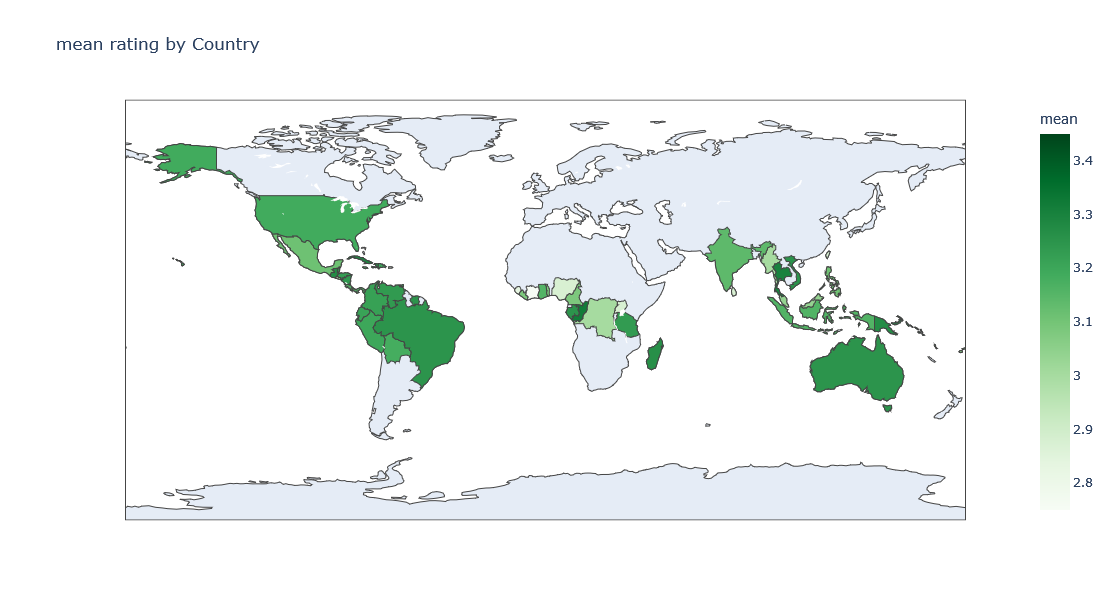

In [35]:
import plotly.express as px


fig = px.choropleth(df_country_mean_median, locations='Country', locationmode='country names',
                    color='mean', hover_name='Country',
                    color_continuous_scale='greens',
                    title='mean rating by Country',
                    width=1000,
                    height=600
                    )
fig.show()

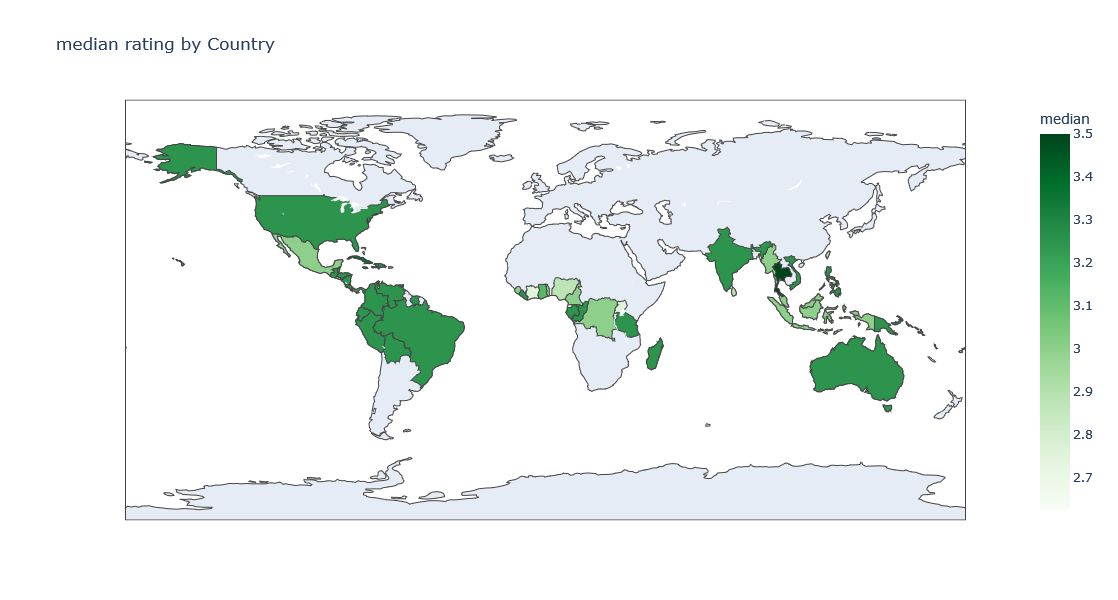

In [37]:

fig = px.choropleth(df_country_mean_median, locations='Country', locationmode='country names',
                    color='median', hover_name='Country',
                    color_continuous_scale='greens',
                    title='median rating by Country',
                    width=1000,
                    height=600)
fig.show()

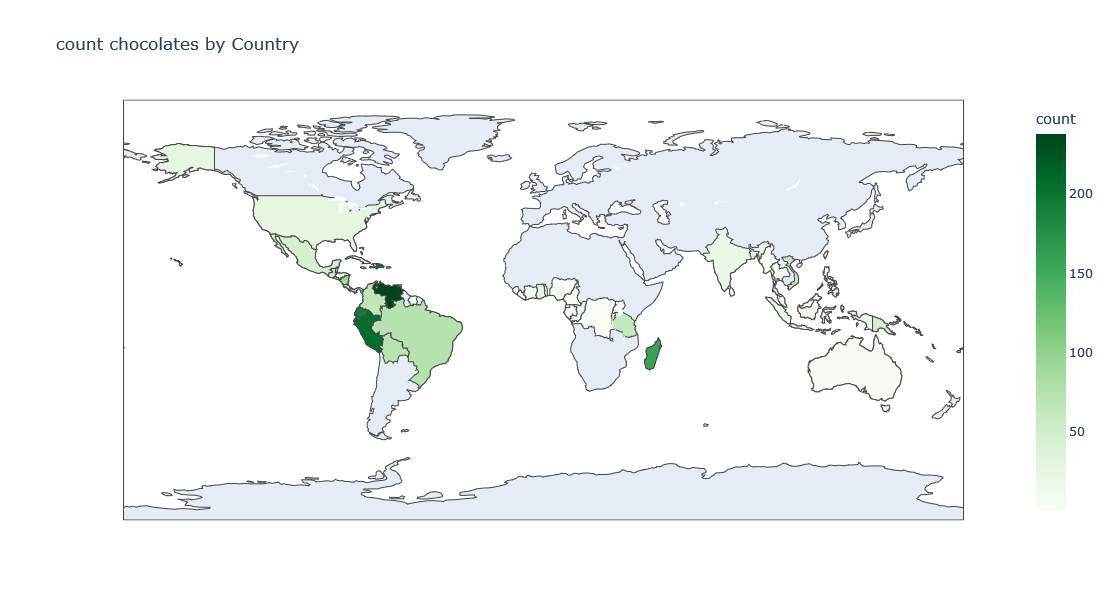

In [39]:
fig = px.choropleth(df_country_mean_median, locations='Country', locationmode='country names',
                    color='count', hover_name='Country',
                    color_continuous_scale='greens',
                    title='count chocolates by Country',
                    width=1000,
                    height=600)
fig.show()

### TO DO 
Wychodzi na to, że czekolada zawsze smakuje dobrze :)
Ogólnie z mapy to wychodzi na to, że im więcej czekolad jest robionych z regionu tym wyższa jest ocena czekolady w tych regionach. 


To sum up, the worst quality we get when the beans of cacao is mixed. Otherwise there is no big impact on the quality of chocolate -> for each region median is the same and mean for the region with the lowest mean value is 1,27 % less from the mean for region with the highest mean value.\
The origin of the bean does not impact the rating of the chocolate, except for the blended beans.

In [65]:
df_bean_origin_merge_3_5 = df_bean_origin_merge[df_bean_origin_merge['rating'] >= 3.5]
df_bean_origin_merge_3_5.head()

Country  rating              Region
0   Madagascar    3.75  SUB-SAHARAN AFRICA
4   Madagascar    3.50  SUB-SAHARAN AFRICA
8   Madagascar    3.50  SUB-SAHARAN AFRICA
11  Madagascar    3.75  SUB-SAHARAN AFRICA
12  Madagascar    3.75  SUB-SAHARAN AFRICA

In [67]:
df_bean_origin_regions_3_5 = (df_bean_origin_merge_3_5
                          .groupby('Region')
                          .agg(
                                 rating=('rating', 'mean'),
                                 median=('rating', 'median'),
                                 count=('rating', 'count')
                              )
                          .sort_values('rating', ascending=False)
                         )
df_bean_origin_regions_3_5

rating  median  count
Region                                       
LATIN AMER. & CARIB   3.640625     3.5    592
OCEANIA               3.639706     3.5     34
SUB-SAHARAN AFRICA    3.633197     3.5    122
NORTHERN AMERICA      3.613636     3.5     11
ASIA (EX. NEAR EAST)  3.569149     3.5     47

## Attempt to answer a question:
5. [Optional] How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?

## Attempt to answer a question:
6. [Optional 2] Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).

## SUMMARY